### Novel Corona Virus 2019 Dataset

<b>Context:</b>
From World Health Organization - On 31 December 2019, WHO was alerted to several cases of pneumonia in Wuhan City, Hubei Province of China. The virus did not match any other known virus. This raised concern because when a virus is new, we do not know how it affects people.
So daily level information on the affected people can give some interesting insights when it is made available to the broader data science community.

<b>Content:</b>
2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. Please note that this is a time series data and so the number of cases on any given day is the cumulative number.

The data is available from 22 Jan, 2020.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [3]:
data=pd.read_csv('D:\\Datascience\\kaggle\\corona\\2019_nCoV_data.csv')

In [4]:
data.shape

(1719, 8)

In [28]:
data.head(20)

,Sno,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22 12:00:00,Anhui,China,2020-01-22 12:00:00,1,0,0
1,2,2020-01-22 12:00:00,Beijing,China,2020-01-22 12:00:00,14,0,0
2,3,2020-01-22 12:00:00,Chongqing,China,2020-01-22 12:00:00,6,0,0
3,4,2020-01-22 12:00:00,Fujian,China,2020-01-22 12:00:00,1,0,0
4,5,2020-01-22 12:00:00,Gansu,China,2020-01-22 12:00:00,0,0,0
5,6,2020-01-22 12:00:00,Guangdong,China,2020-01-22 12:00:00,26,0,0
6,7,2020-01-22 12:00:00,Guangxi,China,2020-01-22 12:00:00,2,0,0
7,8,2020-01-22 12:00:00,Guizhou,China,2020-01-22 12:00:00,1,0,0
8,9,2020-01-22 12:00:00,Hainan,China,2020-01-22 12:00:00,4,0,0
9,10,2020-01-22 12:00:00,Hebei,China,2020-01-22 12:00:00,1,0,0


Data Set description:

<b>Sno:</b> Serial number\
<b>Date:</b>  Date and time of observation\
<b>Province/State</b>:  Province or State of observation\
<b>Country:</b>  Country of observation\
<b>Last Update:</b>  Last update date of the row in UTC\
<b>Confirmed:</b>   Cumulative number of confirmed cases\
<b>Deaths:</b>  Cumulative number of deaths\
<b>Recovered:</b>   Cumulative number of recovered cases

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 8 columns):
Sno            1719 non-null int64
Date           1719 non-null datetime64[ns]
State          1257 non-null category
Country        1719 non-null category
Last Update    1719 non-null datetime64[ns]
Confirmed      1719 non-null int32
Deaths         1719 non-null int32
Recovered      1719 non-null int32
dtypes: category(2), datetime64[ns](2), int32(3), int64(1)
memory usage: 68.4 KB


In [14]:
data=data.rename(columns={'Province/State':'State'})

In [7]:
for col in data.select_dtypes('float64'):
    data[col]=data[col].astype('int32')

In [17]:
places=['State', 'Country']

In [18]:
for col in places:
    data[col]=data[col].astype('category')

In [20]:
for col in data.select_dtypes('object'):
    data[col]=pd.to_datetime(data[col])

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sno,1719.0,860.000000,496.376873,1.0,430.5,860.0,1289.5,1719.0
Confirmed,1719.0,454.596859,3712.529032,0.0,2.0,12.0,109.0,59989.0
Deaths,1719.0,10.441536,106.638286,0.0,0.0,0.0,0.0,1789.0
Recovered,1719.0,44.361838,351.078713,0.0,0.0,0.0,7.0,7862.0


In [25]:
data.describe(include='category').T

,count,unique,top,freq
State,1257,61,Zhejiang,27
Country,1719,34,Mainland China,801


In [17]:
data['Country'].unique()

array(['China', 'US', 'Japan', 'Thailand', 'South Korea',
       'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka',
       'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates',
       'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium',
       'Others', 'Egypt'], dtype=object)

#### Missing Values

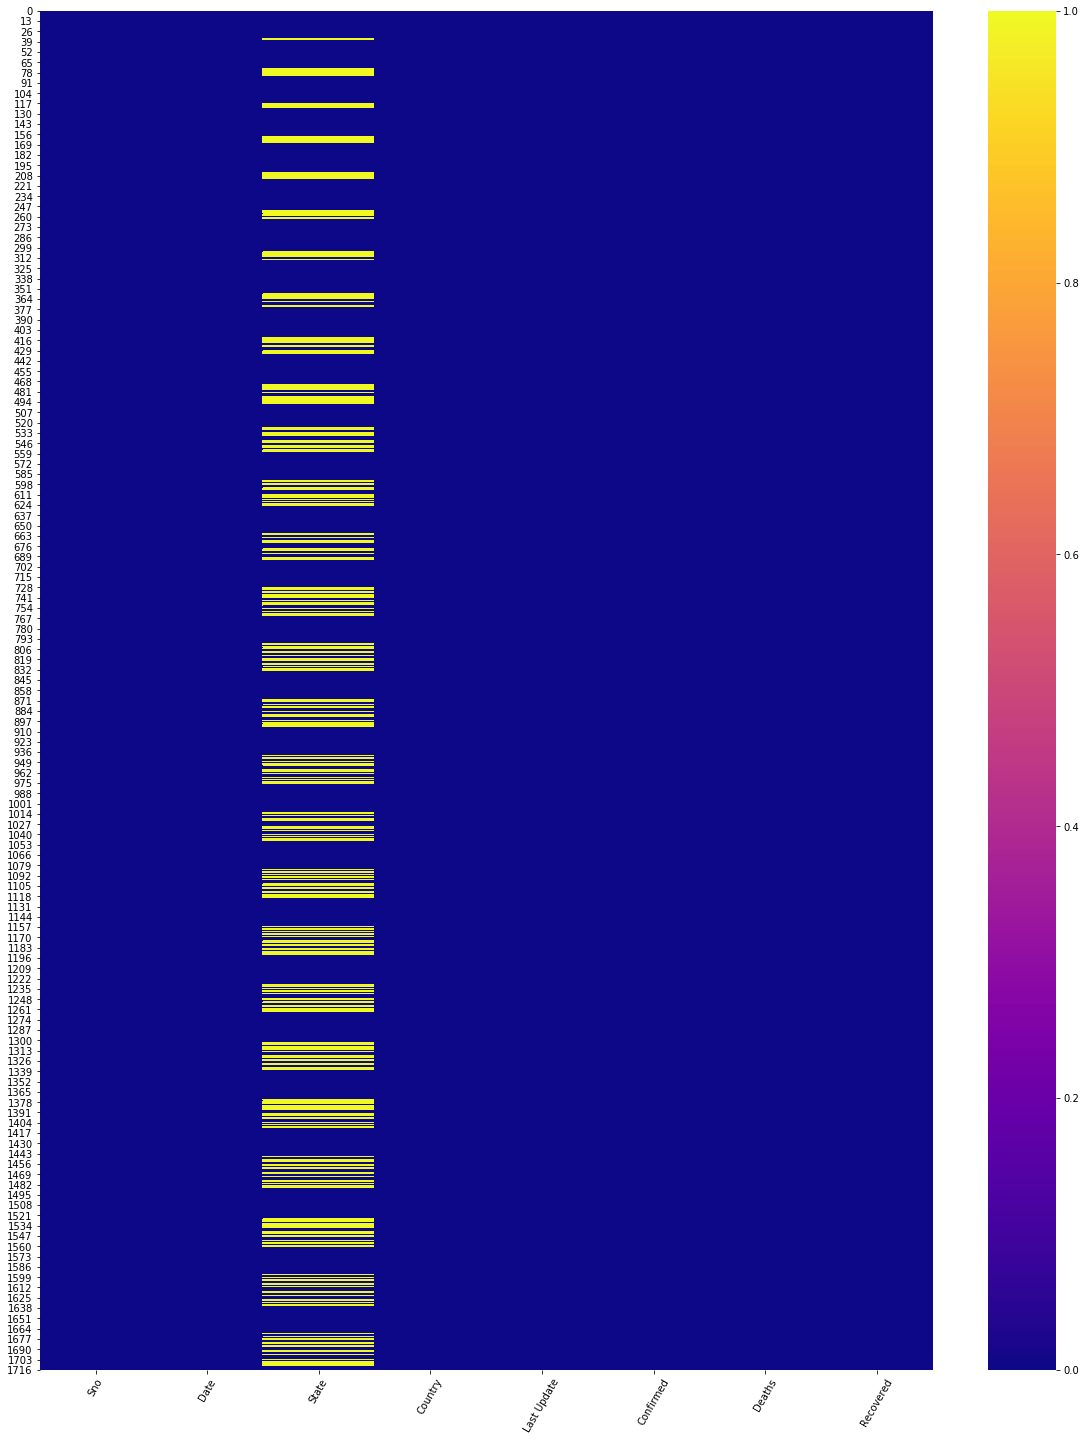

In [26]:
plt.figure(figsize=(20,25))
sns.heatmap(data.isnull(),xticklabels=data.columns, cmap='plasma')
plt.xticks(rotation=60)
plt.show()

# ********* Work in progress*